### Промежуточный проект к модулю "Построение модели"

#### Задание:  
    Мы владеем сетью магазинов, в которых продаются различные товары. Наши сотрудники собрали датасет из 8523 продаж товаров в различных магазинах нашей сети. Наша задача построить модель, предсказывающую продажи каждого продукта в конкретном магазине. Используя эту модель, попробовать выявить факторы, больше всего влияющие на увеличение продаж.

#### Описание датасета:

**Item_Identifier** - Id продукта  
**Item_Weight** - Вес продукта  
**Item_Fat_Content** - Содержание жира в продукте  
**Item_Visibility** - %полок, отведенный под наш продукт в конкретном магазине  
**Item_Type** - Категория продукта  
**Item_MRP** - Максимальная цена продажи продукта  
**Outlet_Identifier** - Идентификатор магазина  
**Outlet_Establishment_Year** - Год открытия магазина  
**Outlet_Size** - Площадь магазина  
**Outlet_Location_Type** - Тип города, в котором расположен магазин  
**Outlet_Type** - Признак является ли магазин продуктовым или супермаркетом  
**Item_Outlet_Sales** - Продажи продукта в конкретном магазине. Именно ее и надо предсказывать  

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

import seaborn as sbs
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [105]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Загрузим данные

In [106]:
df = pd.read_csv('data.csv')
print(df.shape)
df.head()

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##### Будем работать с копией:

In [107]:
data = df.copy()

## Exploratory Data Analysis

[Здесь](https://mlbootcamp.ru/ru/article/tutorial/) хорошо описано, как работать с данными. Например предварительно, целесообразно разделить данные по категориям. Есть таблица с методами класса и описано где какой используется.

In [108]:
print(data.shape)

(8523, 12)


In [109]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [111]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

У нас два признаками с пустыми значенями. Обработаем их.

In [112]:
data['Item_Weight'].interpolate(inplace= True)

print(data['Item_Weight'].isna().sum())
data['Item_Weight'].sample(10)


0


5666     8.380
5288    11.350
943      8.100
4034     6.385
4407     6.905
8331    20.250
755      5.925
8219     5.030
502     10.895
1784    15.100
Name: Item_Weight, dtype: float64

In [113]:
print(data['Outlet_Size'].isna().sum())

data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace= True)

print(data['Outlet_Size'].isna().sum())

2410
0


Двигаемся дальше:

In [114]:
print(f'Число уникальных значений в "Estd.Year": {data.Outlet_Establishment_Year.nunique()}')
print(data.Outlet_Establishment_Year.value_counts(dropna= False))

# we will convert this in to an object as there aren't many values


Число уникальных значений в "Estd.Year": 9
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


In [115]:
data['Outlet_Establishment_Year']= data.Outlet_Establishment_Year.astype('object')

In [116]:
print(data.Outlet_Establishment_Year.dtype)

# преобразовали в тип объект

object


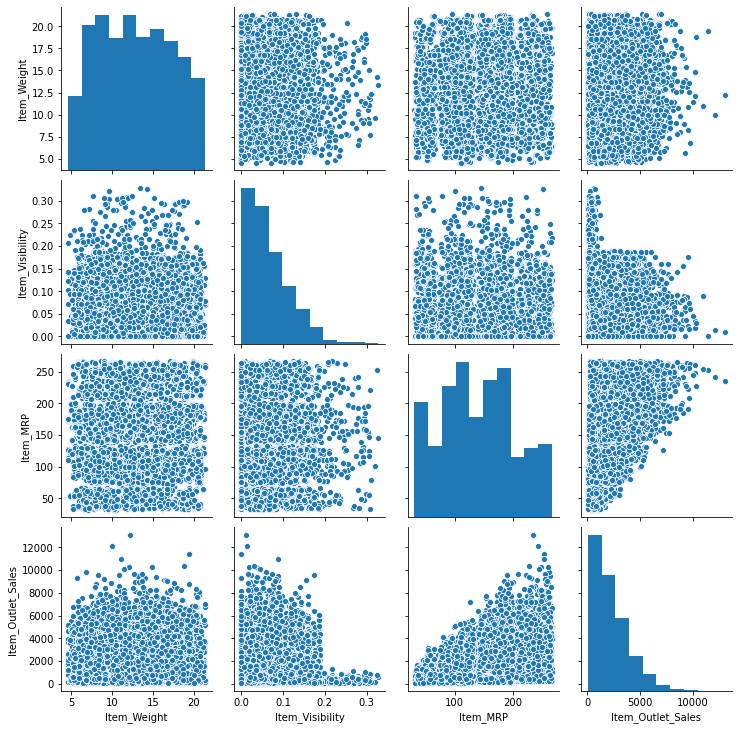

In [117]:
num_cols= [*data.select_dtypes(['int64', 'float64']).columns]

sns.pairplot(data[num_cols])

In [118]:
num_cols.remove('Item_Outlet_Sales')
num_cols

['Item_Weight', 'Item_Visibility', 'Item_MRP']

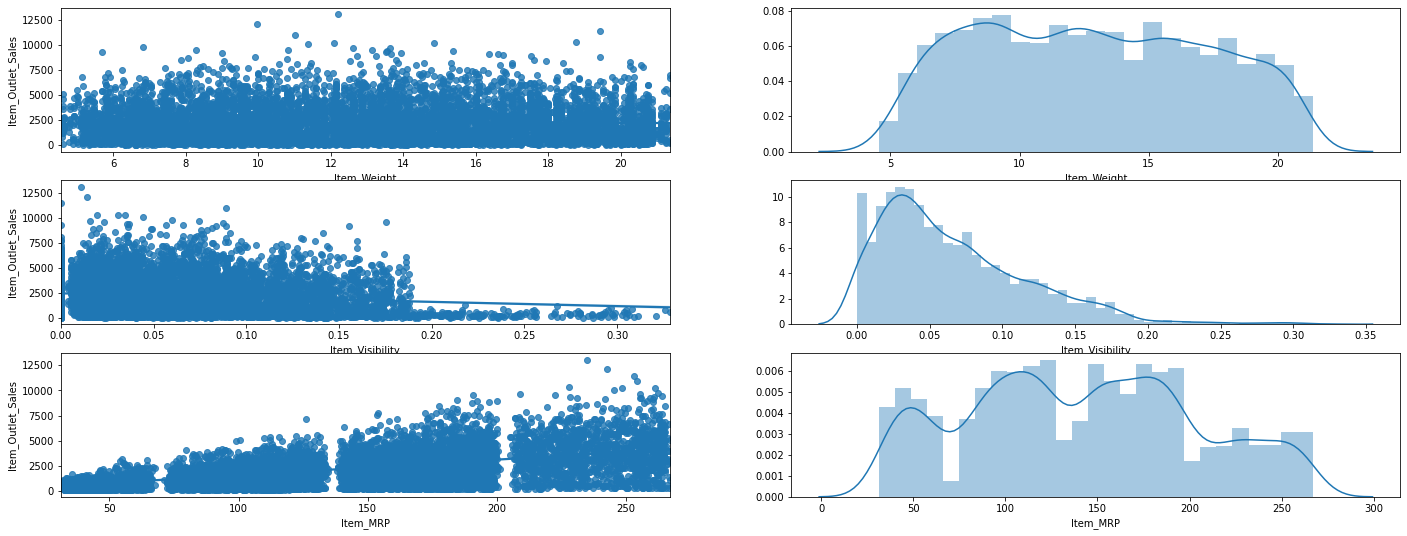

In [119]:
plt.figure(figsize= (24, 9))

count= 1

for col in num_cols:
    
    plt.subplot(3, 2, count)
    
    sns.regplot(x= col, y= 'Item_Outlet_Sales', data= data)
    
    plt.xlabel(col)
    
    count+=1
    
    plt.subplot(3, 2, count)
    
    sns.distplot(data.loc[data[col].notnull(), col])
    
    count+= 1

In [120]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [121]:
obj_cols= [*data.select_dtypes('object').columns]

obj_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [122]:
for col in obj_cols:
    
    if data[col].nunique() > 10:
        print(f'Число уникальных значений в {col} is {data[col].nunique()}.')
        print(" ")
    else:
        
        print(f'Значений в {col}: \n {data[col].value_counts()}')
        print(" ")

Число уникальных значений в Item_Identifier is 1559.
 
Значений в Item_Fat_Content: 
 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
 
Число уникальных значений в Item_Type is 16.
 
Значений в Outlet_Identifier: 
 OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
 
Значений в Outlet_Establishment_Year: 
 1985    1463
1987     932
2004     930
1999     930
1997     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64
 
Значений в Outlet_Size: 
 Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64
 
Значений в Outlet_Location_Type: 
 Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
 
Значений в Outlet_Type: 
 Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935

In [123]:
data['Item_Fat_Content'].value_counts(dropna= False)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [124]:
data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace= True)

# Снова проверим значения
data['Item_Fat_Content'].value_counts(dropna= False)
# Заменили верно

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Обработаем признак Item_Identifier с 1559 уникальными значениями 

In [125]:
print(data['Item_Identifier'].sample(10))

print(data['Item_Identifier'].str[:3].value_counts(dropna= False))

print(data['Item_Identifier'].str[:2].value_counts(dropna= False))

data['Item_Identifier']= data['Item_Identifier'].str[:2]


3426    NCL29
4901    FDS39
2222    FDE33
685     FDS10
3998    NCX54
3213    FDX56
2610    NCB54
8289    DRB25
5890    FDP27
768     FDV07
Name: Item_Identifier, dtype: object
FDX    295
FDT    281
FDS    279
FDR    275
FDW    271
      ... 
DRO     14
DRP     12
DRZ     11
DRQ      7
DRY      6
Name: Item_Identifier, Length: 71, dtype: int64
FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64


In [126]:
data['Item_Fat_Content']= np.where(data['Item_Identifier']== 'NC', 'Non-durable', data['Item_Fat_Content'])

In [127]:
data.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
974,FD,14.7000,Low Fat,0.072411,Fruits and Vegetables,48.2034,OUT049,1999,Medium,Tier 1,Supermarket Type1,1020.6714
6241,FD,5.8925,Regular,0.061731,Fruits and Vegetables,159.1578,OUT019,1985,Small,Tier 1,Grocery Store,160.4578
7835,FD,6.6300,Regular,0.018310,Snack Foods,57.7588,OUT010,1998,Medium,Tier 3,Grocery Store,57.2588
2933,FD,10.1625,Low Fat,0.053972,Snack Foods,141.2154,OUT027,1985,Medium,Tier 3,Supermarket Type3,3119.9388
5716,NC,8.5100,Non-durable,0.016143,Household,194.2478,OUT045,2002,Medium,Tier 2,Supermarket Type1,2324.9736
1974,FD,11.6000,Regular,0.157719,Breakfast,168.3474,OUT017,2007,Medium,Tier 2,Supermarket Type1,4548.0798
4017,FD,13.0000,Regular,0.030150,Canned,61.4220,OUT045,2002,Medium,Tier 2,Supermarket Type1,539.2980
1982,FD,8.3900,Regular,0.024243,Frozen Foods,116.0176,OUT049,1999,Medium,Tier 1,Supermarket Type1,1603.2464
7476,FD,16.7500,Low Fat,0.128886,Breads,87.6856,OUT046,1997,Small,Tier 1,Supermarket Type1,1494.0552
8490,FD,13.8725,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


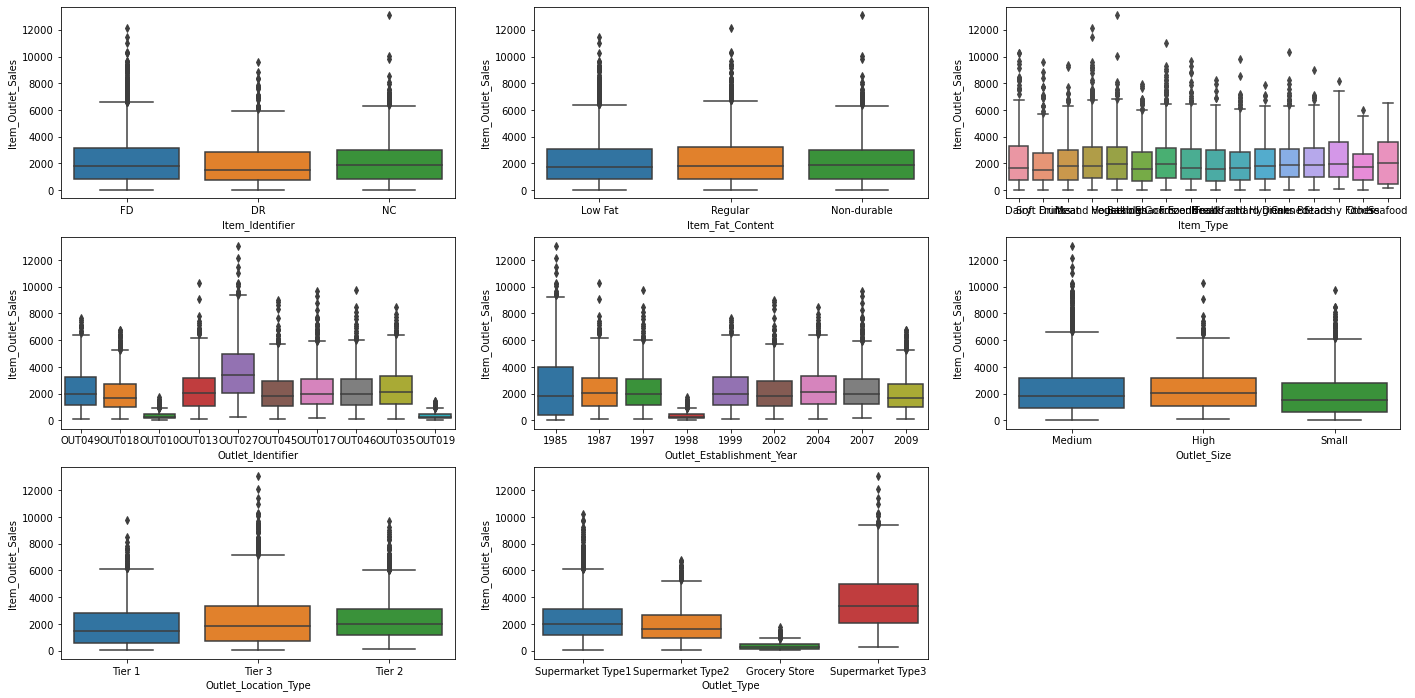

In [128]:
plt.figure(figsize= (24, 12))

for idx, col in enumerate(obj_cols):
    
    plt.subplot(3, 3, idx+1)
    
    sns.boxplot(col, 'Item_Outlet_Sales', data= data)

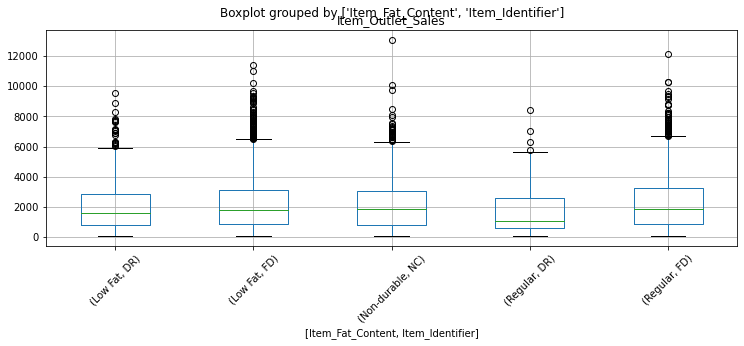

In [129]:
data.boxplot(column= 'Item_Outlet_Sales', by= ['Item_Fat_Content', 'Item_Identifier'], figsize= (12, 4), rot= 45)

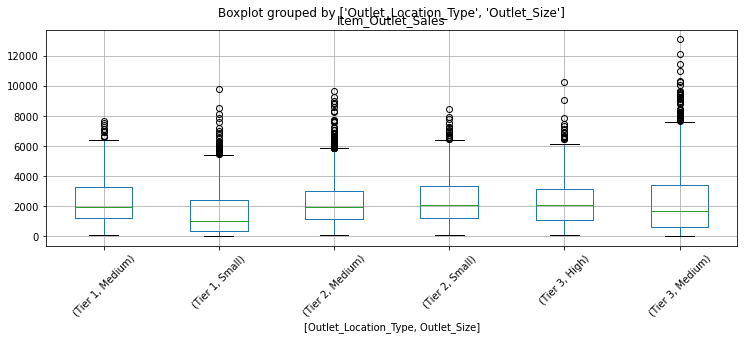

In [130]:
data.boxplot(column= 'Item_Outlet_Sales', by= ['Outlet_Location_Type', 'Outlet_Size'], figsize= (12, 4), rot= 45)

In [131]:
# Создадим dummy датафрейм из подготовленного датафрейма

df= pd.get_dummies(data, drop_first= True)

In [132]:
print(df.shape)
df.head()

(8523, 47)


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Non-durable,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,2097.2700,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [133]:
for col in num_cols:
    
    print(f'Минимальное значение в {col}: {data[col].min()}')
    print(" ")
    print(f'Максимальное значение в {col}: {data[col].max()}')
    print(" ")

Минимальное значение в Item_Weight: 4.555
 
Максимальное значение в Item_Weight: 21.35
 
Минимальное значение в Item_Visibility: 0.0
 
Максимальное значение в Item_Visibility: 0.328390948
 
Минимальное значение в Item_MRP: 31.29
 
Максимальное значение в Item_MRP: 266.8884
 


In [135]:
df['Non-Visible']= np.where(df['Item_Visibility']==0, 1, 0)

df['Non-Visible'].value_counts(dropna= False)

0    7997
1     526
Name: Non-Visible, dtype: int64

In [136]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Non-durable,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Non-Visible
0,9.30,0.016047,249.8092,3735.1380,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,5.92,0.019278,48.2692,443.4228,0,0,0,1,0,0,...,0,1,1,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,2097.2700,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
4,8.93,0.000000,53.8614,994.7052,0,1,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [137]:
df.isna().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Item_Outlet_Sales                  0
Item_Identifier_FD                 0
Item_Identifier_NC                 0
Item_Fat_Content_Non-durable       0
Item_Fat_Content_Regular           0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT013           0
Outlet_Identifier_OUT017           0
Outlet_Identifier_OUT018           0
Outlet_Identifier_OUT019           0
O

Создали обновленный набор фичей. Нет пропущенных значений. Приступим к выбору моделей.

### Выбор моделей

In [139]:
features = df.drop(columns=['Item_Outlet_Sales']).columns
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(df), columns=df.columns)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['Item_Outlet_Sales']), 
                                                    X['Item_Outlet_Sales'], 
                                                    test_size=0.1)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.1)
print('Train:', X_train.shape, y_train.shape)
print('Dev:', X_dev.shape, y_dev.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (6903, 47) (6903,)
Dev: (767, 47) (767,)
Test: (853, 47) (853,)


### [Ridge - модель](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) с L2-регуляризаций

In [141]:
params = {'alpha':list(np.arange(0.1, 100.0, 0.1)),
          'max_iter':[500, 1000, 2000, 5000, 10000],
          'tol':[1e-3, 1e-2, 1e-4, 1e-5],
          'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']          
          }

lin_reg = RandomizedSearchCV(Ridge(), params, cv=10, n_jobs=-1, random_state=13, n_iter=30)
lin_reg = lin_reg.fit(X_train, y_train).best_estimator_
lin_reg

Ridge(alpha=18.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, random_state=None, solver='lsqr', tol=0.001)

In [142]:
pd.DataFrame({'True': y_dev, 'Predicted': lin_reg.predict(X_dev), 'Deviation, %': (y_dev-lin_reg.predict(X_dev))/lin_reg.predict(X_dev)})


,True,Predicted,"Deviation, %"
7165,-0.800331,-0.873590,-0.083860
4432,1.398324,0.822594,0.699896
8018,-0.203748,0.599491,-1.339869
3747,1.202454,1.116116,0.077356
4575,-0.126493,-0.134999,-0.063009
...,...,...,...
155,0.825542,0.611032,0.351063
8159,-0.357478,-0.032912,9.861585
1139,0.127903,0.953733,-0.865892
6943,-1.087502,-0.266002,3.088326


In [143]:
print('\nМетрики модели:\n')
print('MSE:', np.sqrt(mean_squared_error(y_dev, lin_reg.predict(X_dev))))
print('MAE:', mean_absolute_error(y_dev, lin_reg.predict(X_dev)))


Метрики модели:

MSE: 0.644470271410192
MAE: 0.4824293814424826


In [97]:
pd.Series(lin_reg.coef_, index = features).abs().sort_values(ascending=False).head(10)

Item_MRP                          0.566824
Outlet_Establishment_Year_1998    0.218995
Outlet_Identifier_OUT027          0.170804
Outlet_Type_Supermarket Type3     0.170804
Outlet_Identifier_OUT019          0.170275
Outlet_Type_Supermarket Type1     0.083205
Outlet_Size_Small                 0.040071
Outlet_Establishment_Year_2004    0.037832
Outlet_Identifier_OUT035          0.037832
Outlet_Establishment_Year_1997    0.036103
dtype: float64

**Максимальная цена продажи и год открытия магазина (1998) влияют согласно этой модели на целевую переменную**

### [RandomForestRegressor - модель](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [149]:
params = {   'criterion': ['mse', 'mae'],
             'max_depth': list(range(5, 20, 1)),
             'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_leaf': list(range(1, 8, 1)),
             'min_samples_split': list(range(2, 8, 1)),
             'n_estimators': list(range(5, 20, 1)),
             'n_jobs': [-1],
             'random_state': [13]}

rf_regr = RandomizedSearchCV(RandomForestRegressor(), params, cv=6, n_jobs=-1, n_iter=10, random_state=13)
rf_regr =  rf_regr.fit(X_train, y_train).best_estimator_
rf_regr

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=8, n_jobs=-1, oob_score=False,
                      random_state=13, verbose=0, warm_start=False)

In [150]:
pd.DataFrame({'Actual': y_dev, 'Predicted': rf_regr.predict(X_dev), 'Deviation, %': (y_dev-rf_regr.predict(X_dev))/rf_regr.predict(X_dev)})


,Actual,Predicted,"Deviation, %"
7165,-0.800331,-1.047165,-0.235716
4432,1.398324,0.998267,0.400751
8018,-0.203748,0.266598,-1.764251
3747,1.202454,1.070058,0.123729
4575,-0.126493,-0.224962,-0.437715
...,...,...,...
155,0.825542,0.622265,0.326673
8159,-0.357478,0.168277,-3.124349
1139,0.127903,0.619799,-0.793637
6943,-1.087502,-0.267817,3.060620


In [151]:
print('MSE:', np.sqrt(mean_squared_error(y_dev, rf_regr.predict(X_dev))))
print('MAE:', mean_absolute_error(y_dev, rf_regr.predict(X_dev)))

MSE: 0.6194775912791474
MAE: 0.4341273910998516


In [152]:
pd.Series(rf_regr.feature_importances_, index=features).sort_values(ascending=False).head(10)

Item_MRP                          0.545105
Outlet_Type_Supermarket Type1     0.158260
Outlet_Type_Supermarket Type3     0.101026
Outlet_Identifier_OUT027          0.071111
Outlet_Establishment_Year_2009    0.044539
Outlet_Type_Supermarket Type2     0.032210
Outlet_Identifier_OUT018          0.022973
Item_Visibility                   0.006151
Outlet_Establishment_Year_1998    0.005390
Outlet_Identifier_OUT019          0.004909
dtype: float64

**Признак является ли магазин продуктовым или супермаркетом вышло на второе место в данной модели.**

####  Улучшение модели, используя стекинг

In [154]:
Stack_regressor = StackingRegressor(
    [
        ('dt', RandomForestRegressor(n_estimators=28, min_samples_leaf=5, min_samples_split=7, max_depth=8,
                                     random_state=13)),
        ('svr', SVR())
    ],
Ridge(alpha=10.8, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, random_state=None, solver='sag', tol=0.001))

In [155]:
Stack_regressor = Stack_regressor.fit(X_train, y_train)

In [157]:
print('MSE')
print(np.sqrt(mean_squared_error(y_dev, Stack_regressor.predict(X_dev))))
print('MAE')
print(mean_absolute_error(y_dev, Stack_regressor.predict(X_dev)))

MSE
0.6189804960889964
MAE
0.43567937887989916


### На целевую переменную влияют максимальная цена продажи, год открытия магазина и признак является ли магазин продуктовым или супермаркетом.